In [1]:
import os
import datetime
import pandas as pd
from matplotlib import pyplot as plt
from IPython import display, get_ipython
import numpy as np
import seaborn as sns
from scipy import spatial
import swisseph as swe
from itertools import combinations, permutations

# first set path to ephemeris files
swe.set_ephe_path('./ephe')
swe.set_sid_mode(mode=swe.SIDM_GALCENT_RGILBRAND)

In [2]:
swetest = "./swe_unix_src_2.10.03/src/swetest"
exportPath = './export/'
marketPath = './market/'
imgPath = './image/'
valencyPath = exportPath

if not os.path.exists(exportPath):
    os.makedirs(exportPath)


In [3]:
dates_df = pd.DataFrame()

start_year = 2000
horizon = 366 * 50

base = datetime.datetime(start_year,1,1)
dates_df['timestamp'] = list(map(lambda x: base + datetime.timedelta(days=x), range(horizon)))

# dates_df = dates_df.set_index('timestamp', drop=True)



# dates_df_start_date = '1821-01-01'
# # dates_df_end_date = '1822-01-01'
# dates_df_end_date = '1821-08-21'

# dates_df_after_start_date = dates_df.index >= dates_df_start_date
# dates_df_before_end_date = dates_df.index <= dates_df_end_date
# dates_df_between_two_dates = dates_df_after_start_date & dates_df_before_end_date
# dates_df = dates_df.loc[dates_df_between_two_dates]

# print(dates_df)



def dates_to_julian(dates_df):
    col = dates_df['timestamp']   
    dates_df['jd'] = list(map(lambda x: swe.julday(int(x.strftime('%Y')),int(x.strftime('%m')),int(x.strftime('%d'))), col))
    dates_df = dates_df.set_index('timestamp', drop=True)
    return dates_df
    
    
jd_df = dates_to_julian(dates_df)

print(jd_df)


                   jd
timestamp            
2000-01-01  2451545.0
2000-01-02  2451546.0
2000-01-03  2451547.0
2000-01-04  2451548.0
2000-01-05  2451549.0
...               ...
2050-02-02  2469840.0
2050-02-03  2469841.0
2050-02-04  2469842.0
2050-02-05  2469843.0
2050-02-06  2469844.0

[18300 rows x 1 columns]


In [4]:
center = 'geo'

# geo
planets = [
'Sun',
'Moon',
'Mercury',
'Venus',
'Mars',
'Jupiter',
'Saturn',
'Uranus',
'Neptune',
'Pluto',
    
# 'mean_Node',
# 'true_Node',
# 'mean_Apogee',
# 'osc_Apogee',
# 'intp_Apogee',
# 'intp_Perigee',
    
# 'Chiron',
# 'Pholus',
# 'Ceres',
# 'Pallas',
# 'Juno',
# 'Vesta'
]

In [5]:
def latitude(jd, center, planet):
    if center == 'geo':
        if planet == 'Sun':
            data = swe.calc_ut(jd, swe.SUN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Moon':
            data = swe.calc_ut(jd, swe.MOON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Mercury':
            data = swe.calc_ut(jd, swe.MERCURY, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Venus':
            data = swe.calc_ut(jd, swe.VENUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Mars':
            data = swe.calc_ut(jd, swe.MARS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Jupiter':
            data = swe.calc_ut(jd, swe.JUPITER, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Saturn':
            data = swe.calc_ut(jd, swe.SATURN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Uranus':
            data = swe.calc_ut(jd, swe.URANUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Neptune':
            data = swe.calc_ut(jd, swe.NEPTUNE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]          
        elif planet == 'Pluto':
            data = swe.calc_ut(jd, swe.PLUTO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  

        elif planet == 'mean_node':
            data = swe.calc_ut(jd, swe.MEAN_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]         
        elif planet == 'true_node':
            data = swe.calc_ut(jd, swe.TRUE_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]      
        elif planet == 'mean_apogee':
            data = swe.calc_ut(jd, swe.MEAN_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'osc_apogee':
            data = swe.calc_ut(jd, swe.OSCU_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]      
        elif planet == 'intp_apogee':
            data = swe.calc_ut(jd, swe.INTP_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]       
        elif planet == 'intp_perigee':
            data = swe.calc_ut(jd, swe.INTP_PERG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1] 

        elif planet == 'Chiron':
            data = swe.calc_ut(jd, swe.CHIRON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Pholus':
            data = swe.calc_ut(jd, swe.PHOLUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Ceres':
            data = swe.calc_ut(jd, swe.CERES, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Pallas':
            data = swe.calc_ut(jd, swe.PALLAS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]  
        elif planet == 'Juno':
            data = swe.calc_ut(jd, swe.JUNO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]          
        elif planet == 'Vesta':
            data = swe.calc_ut(jd, swe.VESTA, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][1]      

    elif center == 'helio':
        if planet == 'Earth':
            data = swe.calc_ut(jd, swe.SUN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Moon':
            data = swe.calc_ut(jd, swe.MOON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Mercury':
            data = swe.calc_ut(jd, swe.MERCURY, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Venus':
            data = swe.calc_ut(jd, swe.VENUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Mars':
            data = swe.calc_ut(jd, swe.MARS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Jupiter':
            data = swe.calc_ut(jd, swe.JUPITER, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Saturn':
            data = swe.calc_ut(jd, swe.SATURN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Uranus':
            data = swe.calc_ut(jd, swe.URANUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Neptune':
            data = swe.calc_ut(jd, swe.NEPTUNE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]          
        elif planet == 'Pluto':
            data = swe.calc_ut(jd, swe.PLUTO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  

        elif planet == 'mean_node':
            data = swe.calc_ut(jd, swe.MEAN_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)   
            return data[0][1] 
        elif planet == 'true_node':
            data = swe.calc_ut(jd, swe.TRUE_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1] 
        elif planet == 'mean_apogee':
            data = swe.calc_ut(jd, swe.MEAN_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1] 
        elif planet == 'osc_apogee':
            data = swe.calc_ut(jd, swe.OSCU_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]    
        elif planet == 'intp_apogee':
            data = swe.calc_ut(jd, swe.INTP_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'intp_perigee':
            data = swe.calc_ut(jd, swe.INTP_PERG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]   

        elif planet == 'Chiron':
            data = swe.calc_ut(jd, swe.CHIRON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Pholus':
            data = swe.calc_ut(jd, swe.PHOLUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Ceres':
            data = swe.calc_ut(jd, swe.CERES, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Pallas':
            data = swe.calc_ut(jd, swe.PALLAS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]  
        elif planet == 'Juno':
            data = swe.calc_ut(jd, swe.JUNO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]          
        elif planet == 'Vesta':
            data = swe.calc_ut(jd, swe.VESTA, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][1]         






In [6]:
def longitude(jd, center, planet):
    if center == 'geo':
        if planet == 'Sun':
            data = swe.calc_ut(jd, swe.SUN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Moon':
            data = swe.calc_ut(jd, swe.MOON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Mercury':
            data = swe.calc_ut(jd, swe.MERCURY, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Venus':
            data = swe.calc_ut(jd, swe.VENUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Mars':
            data = swe.calc_ut(jd, swe.MARS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Jupiter':
            data = swe.calc_ut(jd, swe.JUPITER, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Saturn':
            data = swe.calc_ut(jd, swe.SATURN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Uranus':
            data = swe.calc_ut(jd, swe.URANUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Neptune':
            data = swe.calc_ut(jd, swe.NEPTUNE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]          
        elif planet == 'Pluto':
            data = swe.calc_ut(jd, swe.PLUTO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        
        elif planet == 'mean_node':
            data = swe.calc_ut(jd, swe.MEAN_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]         
        elif planet == 'true_node':
            data = swe.calc_ut(jd, swe.TRUE_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]      
        elif planet == 'mean_apogee':
            data = swe.calc_ut(jd, swe.MEAN_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'osc_apogee':
            data = swe.calc_ut(jd, swe.OSCU_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]      
        elif planet == 'intp_apogee':
            data = swe.calc_ut(jd, swe.INTP_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]       
        elif planet == 'intp_perigee':
            data = swe.calc_ut(jd, swe.INTP_PERG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0] 
        
        elif planet == 'Chiron':
            data = swe.calc_ut(jd, swe.CHIRON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Pholus':
            data = swe.calc_ut(jd, swe.PHOLUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Ceres':
            data = swe.calc_ut(jd, swe.CERES, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Pallas':
            data = swe.calc_ut(jd, swe.PALLAS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]  
        elif planet == 'Juno':
            data = swe.calc_ut(jd, swe.JUNO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]          
        elif planet == 'Vesta':
            data = swe.calc_ut(jd, swe.VESTA, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL)
            return data[0][0]      

    elif center == 'helio':
        if planet == 'Earth':
            data = swe.calc_ut(jd, swe.SUN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Moon':
            data = swe.calc_ut(jd, swe.MOON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Mercury':
            data = swe.calc_ut(jd, swe.MERCURY, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Venus':
            data = swe.calc_ut(jd, swe.VENUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Mars':
            data = swe.calc_ut(jd, swe.MARS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Jupiter':
            data = swe.calc_ut(jd, swe.JUPITER, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Saturn':
            data = swe.calc_ut(jd, swe.SATURN, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Uranus':
            data = swe.calc_ut(jd, swe.URANUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Neptune':
            data = swe.calc_ut(jd, swe.NEPTUNE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]          
        elif planet == 'Pluto':
            data = swe.calc_ut(jd, swe.PLUTO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        
        elif planet == 'mean_node':
            data = swe.calc_ut(jd, swe.MEAN_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)   
            return data[0][0] 
        elif planet == 'true_node':
            data = swe.calc_ut(jd, swe.TRUE_NODE, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0] 
        elif planet == 'mean_apogee':
            data = swe.calc_ut(jd, swe.MEAN_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0] 
        elif planet == 'osc_apogee':
            data = swe.calc_ut(jd, swe.OSCU_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]    
        elif planet == 'intp_apogee':
            data = swe.calc_ut(jd, swe.INTP_APOG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'intp_perigee':
            data = swe.calc_ut(jd, swe.INTP_PERG, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]   
        
        elif planet == 'Chiron':
            data = swe.calc_ut(jd, swe.CHIRON, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Pholus':
            data = swe.calc_ut(jd, swe.PHOLUS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Ceres':
            data = swe.calc_ut(jd, swe.CERES, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Pallas':
            data = swe.calc_ut(jd, swe.PALLAS, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]  
        elif planet == 'Juno':
            data = swe.calc_ut(jd, swe.JUNO, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]          
        elif planet == 'Vesta':
            data = swe.calc_ut(jd, swe.VESTA, flags=swe.FLG_SWIEPH|swe.FLG_SIDEREAL|swe.FLG_HELCTR)
            return data[0][0]         
        
      




In [7]:


df = jd_df.copy()

def planet_to_col(planet):
    df['longitude_' + planet] = list(map(lambda jd: longitude(jd, center, planet), jd_df['jd']))
    df['latitude_' + planet] = list(map(lambda jd: latitude(jd, center, planet), jd_df['jd']))

    
list(map(lambda planet: planet_to_col(planet), planets))



df = df.drop([
    'jd',
     ] , axis='columns')


# print(df.columns)



    
def unwrap_df(df):
    def unwrap_col(col):
        # df[col] =  np.unwrap(2 * df[col]) / 2
        df[col] =  np.unwrap(df[col])
    cols = df.columns
    list(map(lambda col: unwrap_col(col), cols))
    
# unwrap_df(df)    

# plt.plot(df)


In [8]:
aspects_df = df.filter(regex='longitude')

from itertools import combinations, permutations

ss = combinations(aspects_df.columns, 2) 
  
def diff_df(s):
    p1 = s[0] 
    p2 = s[1]
    s = 'aspect-' + p1 + '-' + p2
    s = s.replace('longitude_', '')
    print(s, p1, p2)
    df[s] =  df[p1] - df[p2]
    
list(map(lambda s: diff_df(s), list(ss)))

aspect-Sun-Moon longitude_Sun longitude_Moon
aspect-Sun-Mercury longitude_Sun longitude_Mercury
aspect-Sun-Venus longitude_Sun longitude_Venus
aspect-Sun-Mars longitude_Sun longitude_Mars
aspect-Sun-Jupiter longitude_Sun longitude_Jupiter
aspect-Sun-Saturn longitude_Sun longitude_Saturn
aspect-Sun-Uranus longitude_Sun longitude_Uranus
aspect-Sun-Neptune longitude_Sun longitude_Neptune
aspect-Sun-Pluto longitude_Sun longitude_Pluto
aspect-Moon-Mercury longitude_Moon longitude_Mercury
aspect-Moon-Venus longitude_Moon longitude_Venus
aspect-Moon-Mars longitude_Moon longitude_Mars
aspect-Moon-Jupiter longitude_Moon longitude_Jupiter
aspect-Moon-Saturn longitude_Moon longitude_Saturn
aspect-Moon-Uranus longitude_Moon longitude_Uranus
aspect-Moon-Neptune longitude_Moon longitude_Neptune
aspect-Moon-Pluto longitude_Moon longitude_Pluto
aspect-Mercury-Venus longitude_Mercury longitude_Venus
aspect-Mercury-Mars longitude_Mercury longitude_Mars
aspect-Mercury-Jupiter longitude_Mercury longitude_

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [9]:

valency_0    = pd.read_csv(valencyPath + 'valency_0.csv',index_col=0)
valency_180  = pd.read_csv(valencyPath + 'valency_180.csv',index_col=0)
valency_90   = pd.read_csv(valencyPath + 'valency_90.csv',index_col=0)
valency_120  = pd.read_csv(valencyPath + 'valency_120.csv',index_col=0)
valency_60   = pd.read_csv(valencyPath + 'valency_60.csv',index_col=0)
valency_30   = pd.read_csv(valencyPath + 'valency_30.csv',index_col=0)
valency_150  = pd.read_csv(valencyPath + 'valency_150.csv',index_col=0)
valency_72   = pd.read_csv(valencyPath + 'valency_72.csv',index_col=0)  
valency_144  = pd.read_csv(valencyPath + 'valency_144.csv',index_col=0)
valency_45   = pd.read_csv(valencyPath + 'valency_45.csv',index_col=0) 
valency_135  = pd.read_csv(valencyPath + 'valency_135.csv',index_col=0)
valency_36   = pd.read_csv(valencyPath + 'valency_36.csv',index_col=0) 
valency_108  = pd.read_csv(valencyPath + 'valency_108.csv',index_col=0)

print(valency_0)


             Moon  Sun   Mercury     Venus      Mars   Jupiter    Saturn  \
Moon     0.000000    0  0.530233  0.558411  0.495349  0.496599  0.551402   
Sun      0.489311    0  0.507930  0.496711  0.518072  0.477823  0.539785   
Mercury  0.000000    0  0.000000  0.475519  0.524781  0.507071  0.554217   
Venus    0.000000    0  0.000000  0.000000  0.551553  0.526221  0.504926   
Mars     0.000000    0  0.000000  0.000000  0.000000  0.539726  0.515021   
Jupiter  0.000000    0  0.000000  0.000000  0.000000  0.000000  0.565844   
Saturn   0.000000    0  0.000000  0.000000  0.000000  0.000000  0.000000   
Uranus   0.000000    0  0.000000  0.000000  0.000000  0.000000  0.000000   
Neptune  0.000000    0  0.000000  0.000000  0.000000  0.000000  0.000000   
Pluto    0.000000    0  0.000000  0.000000  0.000000  0.000000  0.000000   

           Uranus   Neptune     Pluto  
Moon     0.500000  0.510204  0.526066  
Sun      0.468031  0.569161  0.507592  
Mercury  0.512195  0.571078  0.505747  
Ven

In [10]:
df1 = pd.DataFrame()


aspects = [
    0,
    180,
    90,
    120,
    60,
    30,
    150,
    
    72,
    144,
    45,
    135,
    36,
    108
]


def aspect_df(aspect):
            
    def aspect_col(col, aspect):
        
        def aspect_row(row):
            if row <= aspect + 15 and row >= aspect - 15:
                row = np.cos((((row - aspect) / 360) / 10) * 360) * 10 * v 
            else:
                row = 0    
            return row
        
        p = col.name.split("-")
        acol = str(aspect) + '_' + col.name

        if aspect == 60:
            v = valency_60.loc[p[1], p[2]]
        if aspect == 120:
            v = valency_120.loc[p[1], p[2]]          
        if aspect == 30:
            v = valency_30.loc[p[1], p[2]]           
        if aspect == 90:
            v = valency_90.loc[p[1], p[2]]           
        if aspect == 150:
            v = valency_150.loc[p[1], p[2]]         
        if aspect == 180:
            v = valency_180.loc[p[1], p[2]]         
        if aspect == 0:    
            v = valency_0.loc[p[1], p[2]]    
        if aspect == 72:    
            v = valency_72.loc[p[1], p[2]]    
        if aspect == 144:    
            v = valency_144.loc[p[1], p[2]]             
        if aspect == 45:    
            v = valency_45.loc[p[1], p[2]] 
        if aspect == 135:    
            v = valency_135.loc[p[1], p[2]] 
        if aspect == 36:    
            v = valency_36.loc[p[1], p[2]] 
        if aspect == 108:    
            v = valency_108.loc[p[1], p[2]] 


        df1[acol] = col.apply(lambda row: aspect_row(row)) 

        
    cols = df.filter(regex='aspect').copy()
    list(map(lambda col: aspect_col(cols[col], aspect), cols))
    
    
def cal_aspect(aspect):
    list(map(lambda aspect: aspect_df(aspect), aspects))
    return df1


df1 = cal_aspect(aspects)  



df1.to_csv(exportPath + 'aspects_df.csv', sep=',')

/tmp/ipykernel_10793/2263643778.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[acol] = col.apply(lambda row: aspect_row(row))
/tmp/ipykernel_10793/2263643778.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[acol] = col.apply(lambda row: aspect_row(row))
/tmp/ipykernel_10793/2263643778.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get

In [11]:
print(df1.columns)   

Index(['0_aspect-Sun-Moon', '0_aspect-Sun-Mercury', '0_aspect-Sun-Venus',
       '0_aspect-Sun-Mars', '0_aspect-Sun-Jupiter', '0_aspect-Sun-Saturn',
       '0_aspect-Sun-Uranus', '0_aspect-Sun-Neptune', '0_aspect-Sun-Pluto',
       '0_aspect-Moon-Mercury',
       ...
       '108_aspect-Jupiter-Saturn', '108_aspect-Jupiter-Uranus',
       '108_aspect-Jupiter-Neptune', '108_aspect-Jupiter-Pluto',
       '108_aspect-Saturn-Uranus', '108_aspect-Saturn-Neptune',
       '108_aspect-Saturn-Pluto', '108_aspect-Uranus-Neptune',
       '108_aspect-Uranus-Pluto', '108_aspect-Neptune-Pluto'],
      dtype='object', length=585)


In [12]:
df2 = pd.DataFrame()


short_df = df1.filter(regex='Moon')
print(short_df.columns, len(short_df.columns))
df2['short_terms_sum'] = short_df.sum(axis=1)


middle_df = df1.filter(regex='^(?=.*(?:Sun|Mercury|Venus|Mars))(?!.*(?:Moon))')
print(middle_df.columns, len(middle_df.columns))
df2['middle_terms_sum'] = middle_df.sum(axis=1)


long_df = df1.filter(regex='^((?!Sun|Mercury|Venus|Mars|Moon).)*$')
print(long_df.columns, len(long_df.columns))
df2['long_terms_sum'] = long_df.sum(axis=1)


print(df2)

Index(['0_aspect-Sun-Moon', '0_aspect-Moon-Mercury', '0_aspect-Moon-Venus',
       '0_aspect-Moon-Mars', '0_aspect-Moon-Jupiter', '0_aspect-Moon-Saturn',
       '0_aspect-Moon-Uranus', '0_aspect-Moon-Neptune', '0_aspect-Moon-Pluto',
       '180_aspect-Sun-Moon',
       ...
       '36_aspect-Moon-Pluto', '108_aspect-Sun-Moon',
       '108_aspect-Moon-Mercury', '108_aspect-Moon-Venus',
       '108_aspect-Moon-Mars', '108_aspect-Moon-Jupiter',
       '108_aspect-Moon-Saturn', '108_aspect-Moon-Uranus',
       '108_aspect-Moon-Neptune', '108_aspect-Moon-Pluto'],
      dtype='object', length=117) 117
Index(['0_aspect-Sun-Mercury', '0_aspect-Sun-Venus', '0_aspect-Sun-Mars',
       '0_aspect-Sun-Jupiter', '0_aspect-Sun-Saturn', '0_aspect-Sun-Uranus',
       '0_aspect-Sun-Neptune', '0_aspect-Sun-Pluto', '0_aspect-Mercury-Venus',
       '0_aspect-Mercury-Mars',
       ...
       '108_aspect-Venus-Jupiter', '108_aspect-Venus-Saturn',
       '108_aspect-Venus-Uranus', '108_aspect-Venus-Neptune',
 

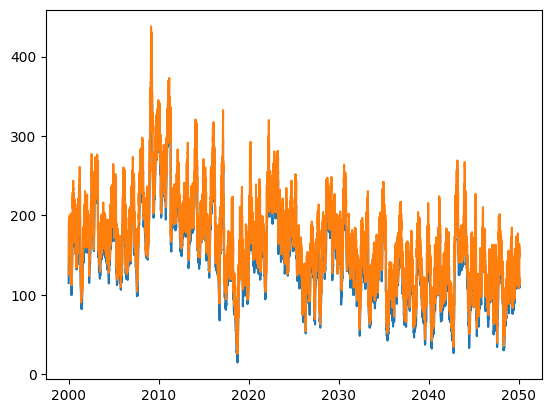

In [13]:
def potential(df, df2):
    
    D = df[['latitude_Venus','latitude_Mars']].sum(axis=1) 
    L = df2['long_terms_sum']
    M = df2['middle_terms_sum']
    S = df2['short_terms_sum']
    

    P = 5 *(L+D)+M  
    Ps = 5 *(L+D) + M + S
    
    plt.plot(P)
    plt.plot(Ps)
    
    return Ps

p = potential(df, df2)
p = p.to_frame()


p.to_csv(exportPath + 'Bradley-Siderograph.csv', sep=',')

In [14]:
p = pd.read_csv(exportPath + 'Bradley-Siderograph.csv',parse_dates = True,index_col=0)

In [26]:
def min_max_scaling(df):
    # copy the dataframe
    tdf = df.copy()
    # apply min-max scaling
    for column in tdf.columns:
        tdf[column] = (tdf[column] - tdf[column].min()) / (tdf[column].max() - tdf[column].min())
#     tdf = tdf.dropna(axis='columns')
    tdf = tdf.fillna(0)
    return tdf

def log_transform(df):
    # copy the dataframe
    tdf = df.copy()
    # apply log scaling
    for column in tdf.columns:
        tdf[column] = np.log(tdf[column])

    tdf.replace([np.inf, -np.inf], np.nan, inplace=True)
    tdf = tdf.astype(float)
    tdf = tdf.interpolate(method='linear', axis=0).ffill().bfill()
#     tdf = tdf.dropna(axis='columns')
    tdf = tdf.fillna(0)

    return tdf

ticker= (
    'BTCUSD'
    
)



res = 'Day'
# res = 'Week'
# res = 'Month'
# res = 'Quarter'
# res = 'Year'


_df = pd.read_csv(marketPath + ticker + '.csv',parse_dates = True,index_col=0)



if res == 'Day':
    _df = _df.resample('D').mean() 
elif res == 'Week':
    _df = _df.resample('W-MON').mean()    
elif res == 'Month':
    _df = _df.resample('MS').first()
elif res == 'Quarter':
    _df = _df.resample('Q').mean()    
elif res == 'Year':
    _df = _df.resample('Y').mean() 

_df['y'] = _df["close"]

_df = _df.interpolate(method='linear', limit_direction='both')

print(_df)
# _df1 = pd.read_csv(marketPath + ticker1 + '_DO_NOT_DELETE.csv',parse_dates = True,index_col=0)
# _df['y1'] = _df1["close"]

# _df3 = pd.read_csv(marketPath + ticker3 + '_DO_NOT_DELETE.csv',parse_dates = True,index_col=0)
# _df['y3'] = _df3["close"]

# _df2 = pd.read_csv(marketPath + ticker2 + '_DO_NOT_DELETE.csv',parse_dates = True,index_col=0)
# _df['y2'] = _df2["close"]



# _df = pd.merge(_df, _df2, left_index=True,right_index=True)

#######################################################################################################
# today = datetime.date.today()
# d0 = today.strftime("%Y-%m-%d")

# start_date = '2020-01-01'
# end_date =   '2021-01-01'

# start_date = '2021-01-01'
# end_date =   '2022-01-01'

start_date = '2024-01-01'
end_date =   '2024-06-01'

# start_date = '2022-11-01'
# end_date =   '2024-01-01'

# end_date =   '2030-05-25'

# start_date = str(start) + '-01-01'
# end_date =   str(end) + '-01-01'


after_start_date = _df.index >= start_date
before_end_date = _df.index <= end_date
between_two_dates = after_start_date & before_end_date
_df = _df.loc[between_two_dates]


#######################################################################################################


# start_date = '2022-01-01'
# end_date =   '2024-01-01'

after_start_date = p.index >= start_date
before_end_date = p.index <= end_date
between_two_dates = after_start_date & before_end_date
p1 = p.loc[between_two_dates].copy()


def opposite(x):
    if x > 0 or x < 0:
        x = x * -1
    return x


p2 = list(map(lambda x: opposite(x), p1.values))

p2 = pd.DataFrame(p2)
p2.index = p1.index
p1 = min_max_scaling(p1)
p2 = min_max_scaling(p2)

year = start_date + ' to ' + end_date



                    open          high           low         close  \
timestamp                                                            
2009-10-05      0.000764      0.000764      0.000764      0.000764   
2009-10-06      0.000885      0.000885      0.000885      0.000885   
2009-10-07      0.001050      0.001050      0.001050      0.001050   
2009-10-08      0.001084      0.001084      0.001084      0.001084   
2009-10-09      0.001200      0.001200      0.001200      0.001200   
...                  ...           ...           ...           ...   
2024-03-04  63146.760000  68465.500000  62288.500000  68285.060000   
2024-03-05  68288.080000  69156.650000  59173.920000  63792.770000   
2024-03-06  63798.340000  67653.840000  62833.750000  66103.550000   
2024-03-07  66102.850000  68042.770000  65621.410000  66885.680000   
2024-03-08  66884.480000  66965.050000  66833.860000  66963.050000   

                  volume             y  
timestamp                               
2009-10

In [27]:
_df = log_transform(_df)
_df = min_max_scaling(_df)



In [28]:
p1 = min_max_scaling(p1)

p2 = min_max_scaling(p2)


corrdf = pd.concat([_df['y'], p1, p2], axis=1)
corrdf.columns = ['y', 'p1', 'p2']

corrdf = corrdf.fillna(0)


p1_fitness = round((1 - spatial.distance.cosine(corrdf['p1'], corrdf['y'])) * 100, 2)
p2_fitness = round((1 - spatial.distance.cosine(corrdf['p2'], corrdf['y'])) * 100, 2)
diff_fitness = round(abs(p1_fitness-p2_fitness), 2)

print('p1', p1_fitness)
print('p2', p2_fitness)
print('diff', diff_fitness)

# 2022
corr = '\nP1: ' + str(p1_fitness) + ' %' + '\nP2: ' + str(p2_fitness) + ' %'




p1 56.88
p2 40.63
diff 16.25


In [29]:
import matplotlib.pyplot as plt
plt.matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

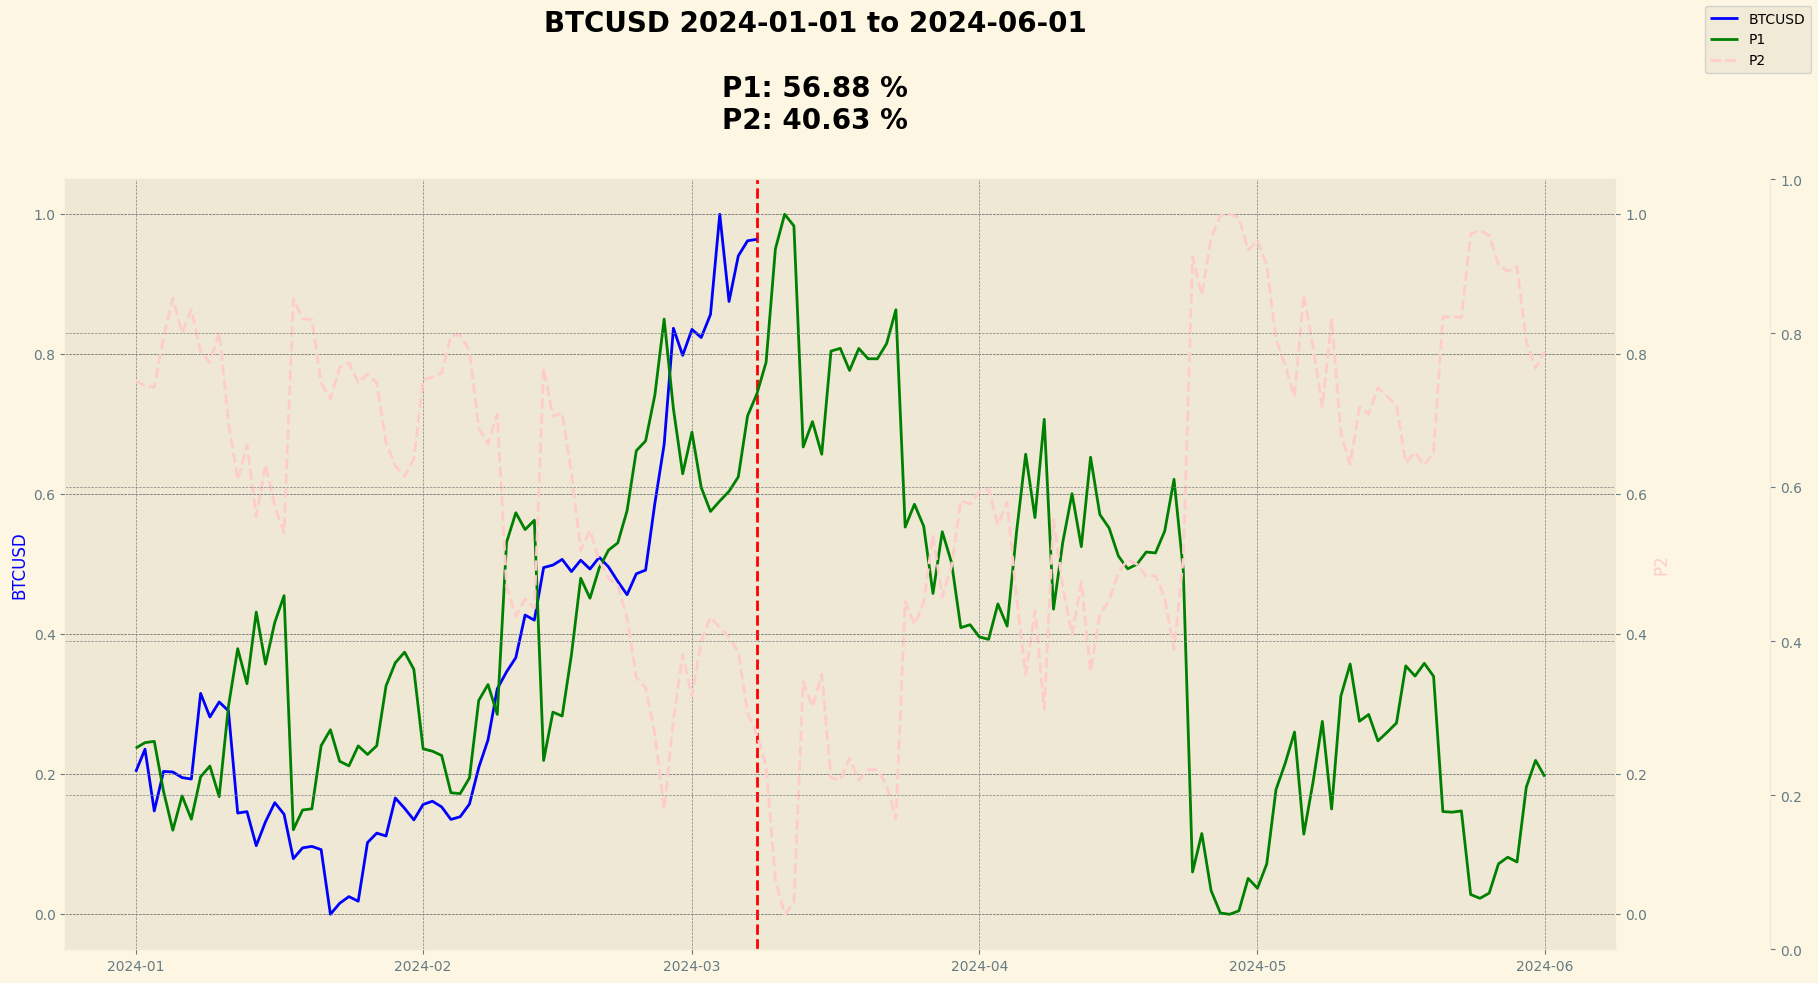

In [30]:
import matplotlib.pyplot as plt

# Set a dark style for the plot
plt.style.use('Solarize_Light2')

# Create a figure with three subplots that share the same x-axis
fig, ax1 = plt.subplots(figsize=(20,10), sharex=True)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Offset the last y-axis to the right by 60 pixels
ax3.spines["right"].set_position(("axes", 1.1))

#--------------------------------------------------
# Find the last x-value in _df['y']
last_x = _df['y'].index[-1]

# Add a vertical line at the last x-value
ax1.axvline(x=last_x, linewidth=2, color='red', linestyle='--')

# Find the index label of the last row
last_index_label = _df.index[-1]

last_index_string = last_index_label.strftime('%Y-%m-%d')

# Get the value of the last row in the 'value' column
last_value = _df['y'].iloc[-1]

# Annotate the last value
plt.annotate(f'({last_index_string})', xy=(last_index_label, last_value), xytext=(last_index_label, last_value - 0.0),
             ha='center'
             # arrowprops=dict(facecolor='black', arrowstyle='->')
)

#--------------------------------------------------

# Plot time series 1 on ax1
ax1.plot(_df['y'], linewidth=2, color="blue", label=ticker)
ax1.set_ylabel(ticker, color='blue')

shift = 0

    
# ax2.plot(p1.shift(shift), linewidth=2, color="green", label="P1")
# ax2.set_ylabel('P1', color='green')

if p1_fitness > p2_fitness:
   # Plot time series 2 on ax2
    ax2.plot(p1.shift(shift), linewidth=2, color="green", label="P1")
    ax2.set_ylabel('P1', color='green')
    
    ax2.plot(p2.shift(shift), linewidth=2, color="#ffcccc", label="P2", linestyle='--')
    ax2.set_ylabel('P2', color='#ffcccc')    
    
else:
   # Plot time series 2 on ax2
    ax2.plot(p2.shift(shift), linewidth=2, color="green", label="P2")
    ax2.set_ylabel('P2', color='green')
    
    ax2.plot(p1.shift(shift), linewidth=2, color="#ffcccc", label="P1", linestyle='--')
    ax2.set_ylabel('P1', color='#ffcccc')    

# Set a title for the entire figure
title = ticker + " " + year + "\n" + corr + "\n" 
title_obj = fig.suptitle(title, fontsize=20, fontweight="bold")

# Move the title down and away from the plot
title_obj.set_position([.5, 1.05])


# Set a grid on all three axes
grid_style = {'linewidth': 0.5, 'color': 'gray', 'linestyle': '--'}
ax1.grid(True, **grid_style)
ax2.grid(True, **grid_style)
ax3.grid(True, **grid_style)

# Add a legend for all three axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()

lines += lines2 + lines3
labels += labels2 + labels3

fig.legend(lines, labels, loc='upper right')

plt.savefig(imgPath + ticker + " " + year, dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
swe.close()